In [1]:
import pandas as pd
import math
import cv2
import dlib
import time
from collections import Counter
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [2]:
import data_process

x, y = data_process.process_data('dataset.csv', "OTHER")
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

SDGclass = SGDClassifier(loss='log', alpha=0.1, penalty='l2')

In [3]:
SDGclass = SDGclass.fit(X_train, y_train)
y_pred = SDGclass.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

print(accuracy_score(y_test, y_pred)*100)

91.19496855345912


In [5]:
x2, y2 = data_process.process_data('dataset2.csv', "OTHER")
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.33, random_state=42)

SDGclass2 = SGDClassifier(loss='log', alpha=0.1, penalty='l2')

SDGclass2 = SDGclass2.fit(X_train2, y_train2)
y_pred2 = SDGclass2.predict(X_test2)


96.85534591194968


In [6]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, label_binarize

metrics = list()
cm = dict()

y_test_true = y_test
y_test_true2 = y_test2

enc = LabelEncoder()
y_test = enc.fit_transform(y_test)
y_pred = enc.fit_transform(y_pred)

y_test2 = enc.fit_transform(y_test2)
y_pred2 = enc.fit_transform(y_pred2)

precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2]),
        label_binarize(y_pred, classes=[0,1,2]),
        average='weighted', multi_class='ovr')
metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore':fscore, 'accuracy':accuracy, 'AUC':auc}, name="model1"))
cm = confusion_matrix(y_test,y_pred)

metrics2 = list()
cm2 = dict()

precision2, recall2, fscore2, _ = score(y_test2, y_pred2, average='weighted')
accuracy2 = accuracy_score(y_test2, y_pred2)
auc2 = roc_auc_score(label_binarize(y_test2, classes=[0,1,2]),
        label_binarize(y_pred2, classes=[0,1,2]),
        average='weighted', multi_class='ovr')
metrics2.append(pd.Series({'precision':precision2, 'recall':recall2, 'fscore':fscore2, 'accuracy':accuracy2,'AUC':auc2}, name="model2"))
cm2 = confusion_matrix(y_test2,y_pred2)
m = metrics + metrics2
metrics = pd.concat(m, axis=1)

metrics



,model1,model2
precision,0.914046,0.969374
recall,0.911950,0.968553
fscore,0.910346,0.968826
accuracy,0.911950,0.968553
AUC,0.962298,0.986080


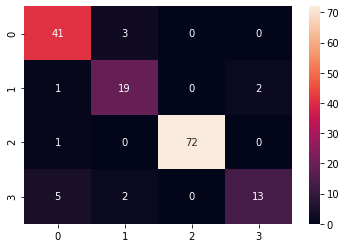

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plot_confusion_matrix(SDGclass, X_test, y_test_true)



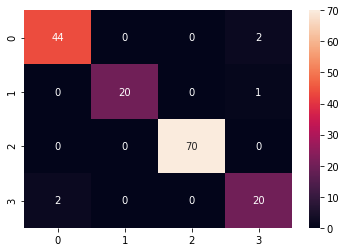

In [8]:

plot_confusion_matrix(SDGclass2, X_test2, y_test_true2)

ValueError: Mix of label input types (string and number)